### Complexité des algorithmes - Précision des algorithmes
### Détermination du flou dans une série d'images

La photographie numérique s’est considérablement développée dans tous les secteurs : celui des particuliers bien évidemment, chacun étant équipé aujourd’hui d’un appareil photo inclus dans son téléphone portable. Mais dans les domaines industriels et scientifiques également, dans lesquels les prises de vue sont pléthore : surveillance d’installations industrielles, caméras thermiques, détection de pièces défectueuses sur une chaîne de fabrication, satellites militaires, satellites météo, etc. Ainsi, on se rappelle que le téléscope spatial Hubble, à cause d’un problème de lentille, a renvoyé pendant de nombreux mois des images floues (voir figure ??) qui ont nécessité un post-traitement.

Figure 1 – À gauche, photo floue prise par Hubble. À droite, l’image après correction du flou.

Rien que pour les particuliers, on estime à 1200 milliards 1 le nombre de photographies numériques prises par les humains à l’aide de leur smartphone en 2017 ! Parmi ces photographies, certaines sont « floues » ou « manquent de netteté ». Certaines, « très floues », peuvent être détectées par l’oeil humain. Pour d’autres, « moins floues », c’est beaucoup plus difficile : « floue », « nette », « moins floue », « plus nette » sont des observations qualitatives.

L’objectif du travail qui vous est proposé est de quantifier la netteté d’une image. On pourra ainsi envisager d’automatiser la détection de flou sur de grands ensembles d’images et éviter un travail fastidieux, et parfois impossible, pour l’oeil humain. Sur une image floue, chaque pixel est « proche » de la moyenne des pixels adjacents.

Le sujet propose d'expérimenter plusieurs algorithmes de calcul de proximité pour évaluer automatiquement la netteté d’une image.

Les photos que nous étudierons, présentes dans le sous-répertoire photos, sont représentées figure 1 page 2.

## Travail péliminaire : chargement des images

### Question 1.
Créer une liste `L_critere_oeil` telle que `L_critere_oeil[i]` soit égal à "floue" ou à "nette" selon que l’image n°i vous semble floue ou pas. Afficher la liste `L_qualite`.

### Question 2.
Décrire brièvement les caractéristiques du format d’image des photos de la figure 1. Pour quel type d’images est-il particulièrement adapté ?

### Question 3.
Commenter chaque ligne du code suivant pour expliquer ce qu’il fait :

373 548


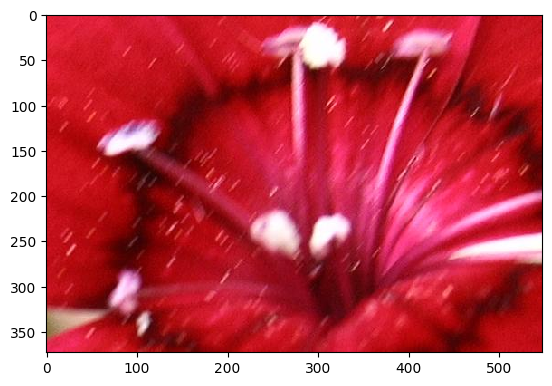

In [3]:
import matplotlib.pyplot as plt
def importe_image(fichier):
    return plt.imread(fichier)
image = importe_image('photos/photo_0.jpg')
hauteur,largeur = image.shape[0],image.shape[1]
print(hauteur, largeur)
plt.imshow(image,interpolation='nearest')
plt.show()

### Question 4.
Quelle est la taille de la première image photo_0.jpg de la figure 1 ? Sachant que chaque pixel est stocké comme un triplet d’entiers entre 0 et 255, sur combien d’octets est stocké un pixel ? Calculer la taille (exprimée en octets) de l’image en fonction de sa hauteur h et de sa largeur.

Faire l’application numérique pour la matrice python
correspondant à l’image photo_0.jpg. Comparer avec la taille en octets affichée par le
système d’exploitation en précisant la différence en pourcentage. Quelles caractéristiques
du format JPG permettent d’expliquer cette différence ?

### Question 5.
En pratique, il est plus commode de stocker chaque composante d’un pixel sous forme de réels. Pour cela, on modifie la fonction importe_image utilisée précédemment :

In [ ]:
def importe_image(fichier):
    image = plt.imread(fichier)
    return image/255

Chaque pixel est alors un triplet de nombres réels représentés par des flottants simple précision. Quelle est la taille (exprimée en octets) occupée alors par chaque pixel ? Calculer la taille (exprimée en octets) de l’image en fonction de la hauteur h et de la largeur l. Faire l’application numérique pour la même image que précédemment et expliquer la différence
observée.

## Algorithme de conversion en niveaux de gris

Pour convertir un pixel couleur [R, V,B] (couple de trois flottants) en un pixel gris G (un flottant), on va utiliser ici la formule G = (R + V + B) / 3, c'est-à-dire que la quantité de gris est obtenue comme la moyenne des quantités de R, de V et de B.

On rappelle que la fonction permettant de créer un tableaux de 0 possédans $n$ lignes et $m$ colonnes est:
```python
np.zeros((n, m))
```

### Question 6.
Écrire une fonction `niveaux_gris(image)` qui prend en argument une image et renvoie l’image correspondante convertie en niveaux de gris.